In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [2]:
import tensorflow as tf
data=pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")
(X_train,y_train),(X_test,y_test)= tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:

data.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.tail()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
X_train.shape

(60000, 28, 28)

*60000 represents the number of images in train dataset and 28x28 is the size of images in pixel*

In [7]:
y_train[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [8]:
L=pd.DataFrame(y_train)
L[0].value_counts() 
# to check the number of unique values present( arranged in descending order such that first element is the most frequently occuring element.)

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

8


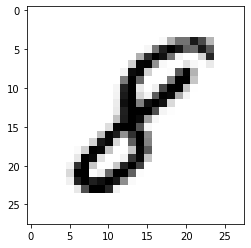

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

image_index = 7777 
print(y_train[image_index]) 
plt.imshow(X_train[image_index], cmap='Greys')

9


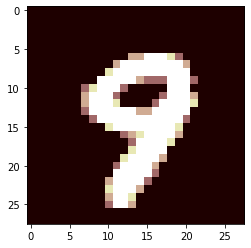

In [10]:
image_index=5999
print(y_train[image_index])
plt.imshow(X_train[image_index],cmap='pink')

 Reshaping the data arrays to have a single colour channel.

In [11]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1) 

There are 10 classes which are represented as unique integers. We can, therefore, use a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 values for all other classes. We can achieve this with the to_categorical() utility function.

In [12]:

# one hot encode target values
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


*This function returns a matrix of binary values(either 0 or 1). It has number of rows equal to the length of the input vector and number of columns equal to the  number of classes.*

In [13]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


To normalize the pixel values of grayscale images, we rescale them to the range 0 to 1. 
This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value i.e. 255 (as the maximum RGB values ranges from 0 to 256.)

In [14]:
# Converting integer to  float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
#Normalizing the RGB codes by dividing it by 255 to convert into  0 and 1
X_train = X_train/255
X_test = X_test/255

In [16]:
print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (60000, 28, 28, 1)
Number of images in X_train 60000
Number of images in X_test 10000


In [17]:
# Defining CNN model
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [18]:
# Creating a Sequential Model and adding the layers
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [19]:
# compiling model using Stochastic Gradient Descent algorithm as optimizer
from keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)# where learning rate is specified as lr (default is 0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1695 - accuracy: 0.9486
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0581 - accuracy: 0.9828
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0373 - accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0266 - accuracy: 0.9919
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0180 - accuracy: 0.9945
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0124 - accuracy: 0.9963
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0088 - accuracy: 0.9976
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0063 - accuracy: 0.9984
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0043 - accuracy: 0.9990
Epoch 10/10
1875/1875 [==============================] - 21s 11m

In [20]:
#using adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0425 - accuracy: 0.9861
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0164 - accuracy: 0.9947
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0124 - accuracy: 0.9955
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0086 - accuracy: 0.9969
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0070 - accuracy: 0.9977
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0061 - accuracy: 0.9980
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0053 - accuracy: 0.9983
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0047 - accuracy: 0.9983
Epoch 10/10
1875/1875 [==============================] - 20s 11m

In [21]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0655 - accuracy: 0.9866


[0.0654664933681488, 0.9865999817848206]

Model shows 98.5% accuracy.

Now, testing our model on test data- Few examples are as follows:

7


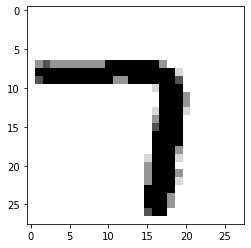

In [22]:
image_index = 4474
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys') 
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

At image index 4474, the image is of value 7 and our model correctly predicted it as 7.

1


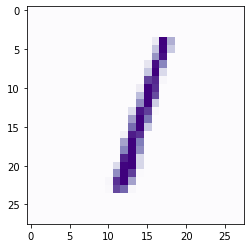

In [23]:
image_index = 2
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Purples')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

Similarly, at image index position 2, the value present is 1 and it is correctly predicted.

3


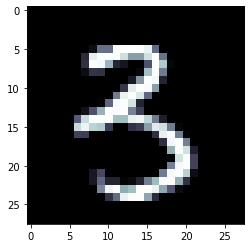

In [24]:
image_index = 5000
plt.imshow(X_test[image_index].reshape(28, 28),cmap='bone')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

At image index position 5000, the value present is 3 which is correctly predicted.